In [1]:
pip install yfinance pandas #libs


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     -


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Tải dữ liệu


In [2]:
import yfinance as yf
import pandas as pd

ticker = "UNI7083-USD"
start_date = "2020-09-18"
end_date = "2024-12-14"

data = yf.download(ticker, start=start_date, end=end_date)

csv_filename = "uniswap_data_clear.csv"
data.to_csv(csv_filename)
print(f"Dữ liệu đã được lưu thành công vào file '{csv_filename}'.")

print("\nThông tin cơ bản của dữ liệu:")
print("Số dòng:", data.shape[0])
print("Số cột:", data.shape[1])
print("Các cột dữ liệu:", list(data.columns))
print("Kiểu dữ liệu của các cột:")
print(data.dtypes)


[*********************100%***********************]  1 of 1 completed

Dữ liệu đã được lưu thành công vào file 'uniswap_data_clear.csv'.

Thông tin cơ bản của dữ liệu:
Số dòng: 1548
Số cột: 5
Các cột dữ liệu: [('Close', 'UNI7083-USD'), ('High', 'UNI7083-USD'), ('Low', 'UNI7083-USD'), ('Open', 'UNI7083-USD'), ('Volume', 'UNI7083-USD')]
Kiểu dữ liệu của các cột:
Price   Ticker     
Close   UNI7083-USD    float64
High    UNI7083-USD    float64
Low     UNI7083-USD    float64
Open    UNI7083-USD    float64
Volume  UNI7083-USD      int64
dtype: object


2.	Truy vấn thông tin dữ liệu

In [ ]:
import yfinance as yf
import pandas as pd
data = pd.read_csv("uniswap_data_clear.csv", index_col=0, header=[0,1])
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)
print("5 dòng đầu của dữ liệu:")
print(data.head())
summary_stats = data.describe()
median_stats = data.median() 
print("\nThống kê tổng quan (describe):")
print(summary_stats)
print("\nTrung vị (median) của các cột:")
print(median_stats)
max_volume_date = data['Volume'].idxmax() 
max_volume = data.loc[max_volume_date, 'Volume']
close_price_on_max_volume = data.loc[max_volume_date, 'Close']
print(f"\nNgày có khối lượng giao dịch cao nhất: {max_volume_date}")
print(f"Khối lượng giao dịch cao nhất: {max_volume}")
print(f"Giá đóng cửa vào ngày đó: {close_price_on_max_volume}")
price_columns = ['Open', 'High', 'Low', 'Close']
average_price_overall = data[price_columns].mean(axis=1).mean()
print(f"\nGiá trung bình của toàn bộ tập dữ liệu (trung bình của Open, High, Low, Close): {average_price_overall}")

5 dòng đầu của dữ liệu:
Price          Close      High       Low      Open      Volume
Date                                                          
2020-09-18  6.897257  8.438537  3.261757  3.488153  6061110198
2020-09-19  5.724464  7.443275  5.321795  6.945577  2447471305
2020-09-20  5.244195  6.050326  4.720210  5.720515  1554143599
2020-09-21  4.266079  5.622155  4.160743  5.244195  1329464490
2020-09-22  3.905138  4.554092  3.755040  4.275014   816282684

Thống kê tổng quan (describe):
Price        Close         High          Low         Open        Volume
count  1548.000000  1548.000000  1548.000000  1548.000000  1.548000e+03
mean     10.927801    11.410113    10.424701    10.919326  3.744476e+08
std       8.373701     8.830303     7.904934     8.375743  5.597329e+08
min       1.930119     2.160387     1.763817     1.930123  2.359653e+07
25%       5.623655     5.865619     5.403960     5.618878  1.044892e+08
50%       6.984065     7.244815     6.754892     6.982504  1.897039e+08

3.	Vẽ biểu đồ giá đóng cửa theo thời gian.

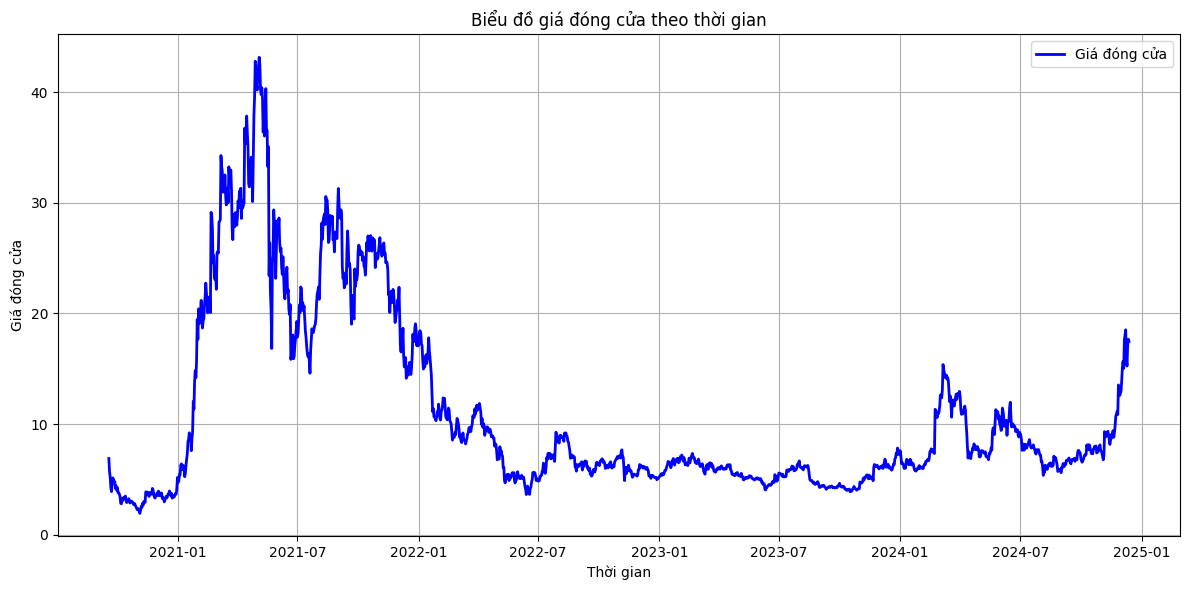

In [5]:
import matplotlib.pyplot as plt
data.index = pd.to_datetime(data.index)

# Vẽ biểu đồ giá đóng cửa theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Giá đóng cửa', color='blue', linewidth=2)
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa theo thời gian')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4. Phân tích tương quan

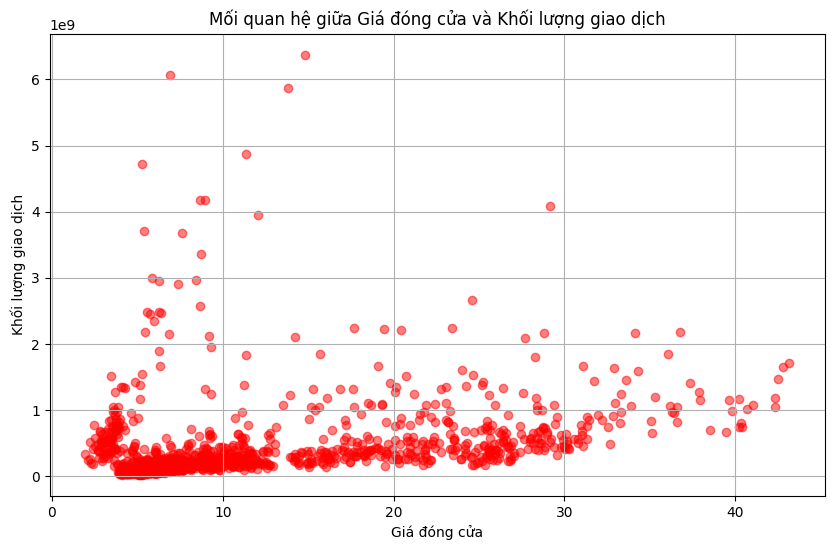

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Close'], data['Volume'], alpha=0.5, color='red')
plt.xlabel("Giá đóng cửa")
plt.ylabel("Khối lượng giao dịch")
plt.title("Mối quan hệ giữa Giá đóng cửa và Khối lượng giao dịch")
plt.grid(True)
plt.show()

5. Xây dựng biểu đồ Moving Average (MA)

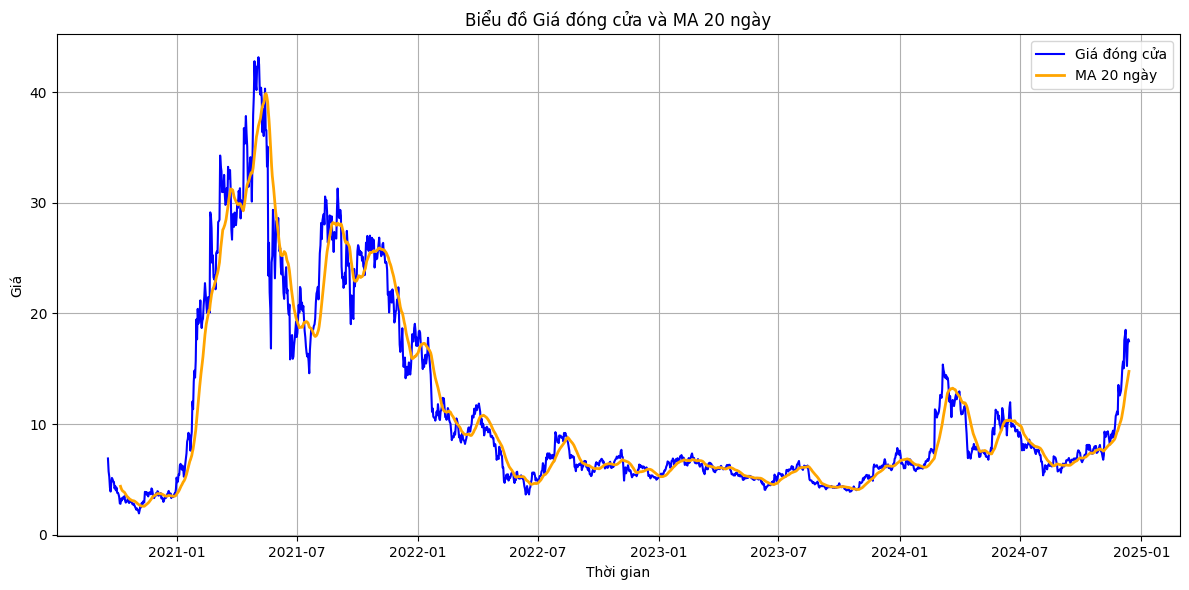

In [ ]:

data['MA20'] = data['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Giá đóng cửa", color='blue')
plt.plot(data.index, data['MA20'], label="MA 20 ngày", color='orange', linewidth=2)
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.title("Biểu đồ Giá đóng cửa và MA 20 ngày")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6.	Phân tích xu hướng giá

In [ ]:

data['Price_change'] = data['Close'] - data['Open']


# Tính tỷ lệ ngày tăng giá và giảm giá
# Ngày tăng giá: Close > Open
# Ngày giảm giá: Close < Open
increase_days = data[data['Price_change'] > 0]
decrease_days = data[data['Price_change'] < 0]
total_days = len(data)

num_increase = len(increase_days)
num_decrease = len(decrease_days)

ratio_increase = num_increase / total_days * 100
ratio_decrease = num_decrease / total_days * 100

print(f"Tỷ lệ ngày tăng giá: {num_increase} ngày ({ratio_increase:.2f}%)")
print(f"Tỷ lệ ngày giảm giá: {num_decrease} ngày ({ratio_decrease:.2f}%)")

# Tính tổng giá trị tăng và giảm giá
total_increase_value = increase_days['Price_change'].sum()
total_decrease_value = decrease_days['Price_change'].sum()  

print(f"\nTổng giá trị tăng giá: {total_increase_value}")
print(f"Tổng giá trị giảm giá: {total_decrease_value}")

# Xác định ngày có mức tăng giá lớn nhất và giảm giá lớn nhất
max_increase_day = data['Price_change'].idxmax()
max_decrease_day = data['Price_change'].idxmin()

max_increase_info = data.loc[max_increase_day, ['Open', 'High', 'Low', 'Close']]
max_decrease_info = data.loc[max_decrease_day, ['Open', 'High', 'Low', 'Close']]

print(f"\nNgày có mức tăng giá lớn nhất: {max_increase_day}")
print(max_increase_info)

print(f"\nNgày có mức giảm giá lớn nhất: {max_decrease_day}")
print(max_decrease_info)

Tỷ lệ ngày tăng giá: 774 ngày (50.00%)
Tỷ lệ ngày giảm giá: 774 ngày (50.00%)

Tổng giá trị tăng giá: 385.58093488216394
Tổng giá trị giảm giá: -372.46151065826416

Ngày có mức tăng giá lớn nhất: 2021-02-20 00:00:00
Price
Open     20.072643
High     32.632683
Low      19.568893
Close    29.140385
Name: 2021-02-20 00:00:00, dtype: float64

Ngày có mức giảm giá lớn nhất: 2021-05-19 00:00:00
Price
Open     35.071213
High     35.485470
Low      16.666702
Close    23.427958
Name: 2021-05-19 00:00:00, dtype: float64


7.	Dự đoán giá đóng cửa

Dữ liệu ban đầu:
Price          Close      High       Low      Open      Volume  MA20  \
Date                                                                   
2020-09-18  6.897257  8.438537  3.261757  3.488153  6061110198   NaN   
2020-09-19  5.724464  7.443275  5.321795  6.945577  2447471305   NaN   
2020-09-20  5.244195  6.050326  4.720210  5.720515  1554143599   NaN   
2020-09-21  4.266079  5.622155  4.160743  5.244195  1329464490   NaN   
2020-09-22  3.905138  4.554092  3.755040  4.275014   816282684   NaN   

Price       Price_change  
Date                      
2020-09-18      3.409104  
2020-09-19     -1.221113  
2020-09-20     -0.476320  
2020-09-21     -0.978116  
2020-09-22     -0.369876  

Kích thước tập huấn luyện: (1238, 4)
Kích thước tập kiểm tra: (310, 4)

Đánh giá mô hình trên tập test:
R²: 0.9969
RMSE: 0.4651


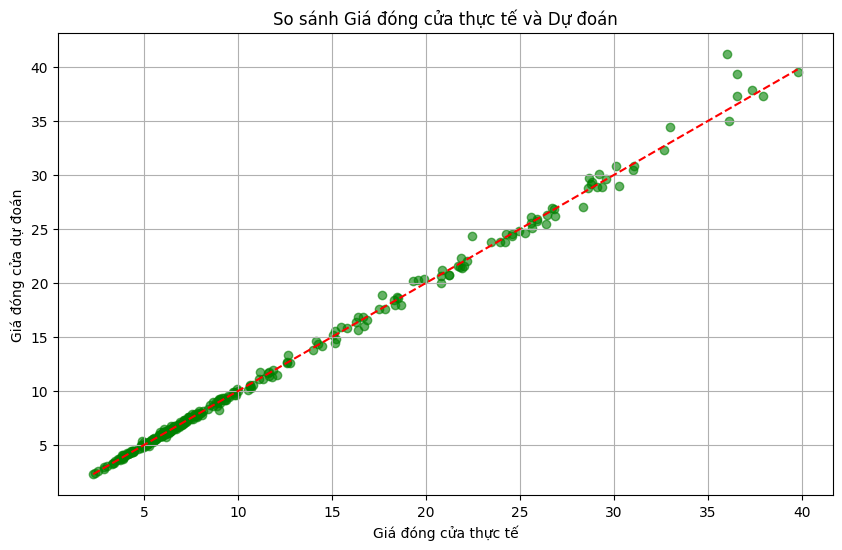

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
print("Dữ liệu ban đầu:")
print(data.head())
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
data_model = data[features + [target]].dropna()

X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nKích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nĐánh giá mô hình trên tập test:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Giá đóng cửa thực tế")
plt.ylabel("Giá đóng cửa dự đoán")
plt.title("So sánh Giá đóng cửa thực tế và Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # đường y=x
plt.grid(True)
plt.show()

8.	Dự đoán giá Uniswap su dung Random Forest

Kích thước tập huấn luyện: (1238, 4)
Kích thước tập kiểm tra: (310, 4)

Đánh giá mô hình Random Forest:
R²: 0.9959
RMSE: 0.5372


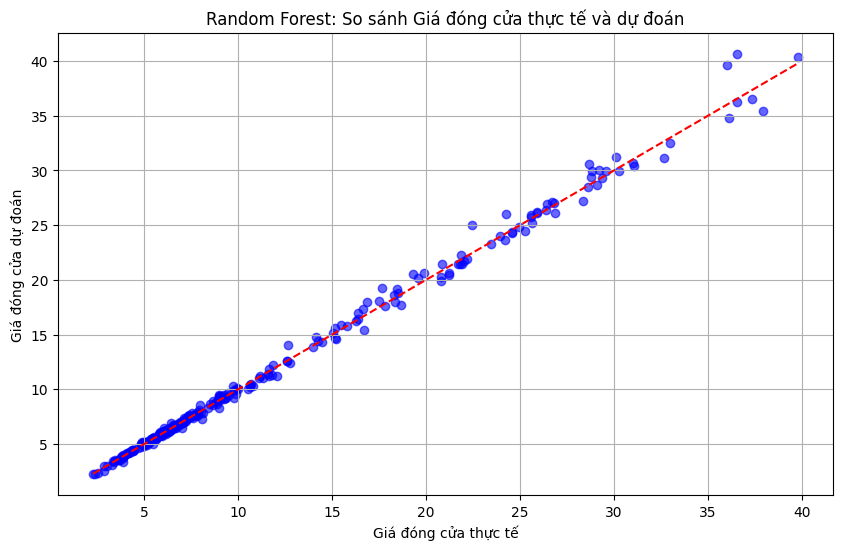

In [10]:
from sklearn.ensemble import RandomForestRegressor
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
data_model = data[features + [target]].dropna()
X = data_model[features]
y = data_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("\nĐánh giá mô hình Random Forest:")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.xlabel("Giá đóng cửa thực tế")
plt.ylabel("Giá đóng cửa dự đoán")
plt.title("Random Forest: So sánh Giá đóng cửa thực tế và dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường y=x
plt.grid(True)
plt.show()